In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('AWHUM NCD DATA.xlsx')
data = data.drop(['CODE', 'AVG. HOUSHOLD INCOME',
       'HAVE YOU HEARD OF HYPERTENSION?', 'IF YES, WHERE?',
       'ARE YOU HYPERTENSIVE?', 'IF YES, ARE YOU ON MEDICATION?',
       'IF YES, LIST THEM', 'WHEN LAST DID YOU CHECK YOUR BP',
       'HAVE YOU HEARD OF DIABETES?', 'IF YES, WHERE?.1',
       'ARE YOU A KNOWN DIABETIC?', 'IF YES, ARE YOU ON MEDICATION?.1',
       'LIST THEM', 'WHEN LAST DID YOU CHECK YOUR BLOOD SUGAR?'], axis=1)
data.head()

,AGE,WAIST CIRCUMFRENCE,WEIGHT,SYSTOLIC,DIASTOLIC,FBS,RBS,HEIGHT,SEX,OCCUPATION,PARITY,LEVEL OF EDUCATION
0,50,30,71,140,90,102.0,NaN,4.10,F,FARMER,4,FSLC
1,45,32,55,115,70,95.0,NaN,5.00,F,RETIRED CIVIL SERVANT,7,NCE
2,68,32,61,160,100,NaN,99.0,5.30,F,FARMER,10,NCE
3,47,30,60,165,110,79.0,NaN,4.11,F,FARMER,3,NONE
4,58,40,76,115,100,199.0,NaN,4.11,F,FARMER,6,FSLC


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 103 non-null    int64  
 1   WAIST CIRCUMFRENCE  103 non-null    int64  
 2   WEIGHT              103 non-null    int64  
 3   SYSTOLIC            103 non-null    int64  
 4   DIASTOLIC           103 non-null    int64  
 5   FBS                 69 non-null     float64
 6   RBS                 34 non-null     float64
 7   HEIGHT              103 non-null    float64
 8   SEX                 103 non-null    object 
 9   OCCUPATION          103 non-null    object 
 10  PARITY              103 non-null    int64  
 11  LEVEL OF EDUCATION  103 non-null    object 
dtypes: float64(3), int64(6), object(3)
memory usage: 9.8+ KB


In [4]:
#generating the BMI
data['HEIGHT'] = data['HEIGHT'].astype(str)
data['FT'] = data['HEIGHT'].apply(lambda x: x[0:1])
data['INCHES'] = data['HEIGHT'].apply(lambda x: x[2:])

data[['FT','INCHES']] = data[['FT','INCHES']].astype(int)
data['INC'] = data['INCHES']
h_ft = data['FT']
h_inch = data['INCHES']


h_inch += h_ft * 12
data["HEIGHT IN CM"] = round(h_inch * 2.54, 1)

data["BMI(kg/m2)"] = round(data["WEIGHT"]/((data["HEIGHT IN CM"])/100)**2, 2)   #Weight(Kg)/Height(m)^2
data[['WEIGHT','HEIGHT','HEIGHT IN CM','BMI(kg/m2)']].head(70)


,WEIGHT,HEIGHT,HEIGHT IN CM,BMI(kg/m2)
0,71,4.1,124.5,45.81
1,55,5.0,152.4,23.68
2,61,5.3,160.0,23.83
3,60,4.11,149.9,26.70
4,76,4.11,149.9,33.82
...,...,...,...,...
65,55,5.1,154.9,22.92
66,64,5.1,154.9,26.67
67,84,5.3,160.0,32.81
68,52,4.9,144.8,24.80


In [5]:
#showing the mean, std deviation, 25th,50th,75th percentile, min and max values of all columns
data.drop(['FT','INC','INCHES'],axis=1,inplace=True)
cols = set(data.columns)
df1 = data[list(cols)]
df1.describe()

,HEIGHT IN CM,BMI(kg/m2),AGE,PARITY,WAIST CIRCUMFRENCE,WEIGHT,FBS,DIASTOLIC,RBS,SYSTOLIC
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,69.000000,103.000000,34.000000,103.000000
mean,154.174757,27.443010,59.106796,5.708738,34.582524,64.796117,92.565217,86.834951,105.764706,139.087379
std,9.228629,5.686123,9.653723,2.176664,4.176320,12.454906,16.730984,11.858725,20.899556,18.500719
min,124.500000,13.540000,38.000000,1.000000,25.000000,40.000000,43.000000,60.000000,76.000000,100.000000
25%,149.900000,23.440000,51.500000,4.000000,32.000000,55.500000,87.000000,80.000000,94.250000,130.000000
50%,154.900000,26.700000,61.000000,6.000000,34.000000,64.000000,92.000000,85.000000,99.000000,140.000000
75%,157.500000,31.430000,67.000000,7.000000,38.000000,74.000000,98.000000,95.000000,113.750000,150.000000
max,180.300000,45.810000,85.000000,12.000000,43.000000,98.000000,199.000000,120.000000,195.000000,200.000000


In [6]:
#Checking for missing values
data.isnull().sum()

AGE                    0
WAIST CIRCUMFRENCE     0
WEIGHT                 0
SYSTOLIC               0
DIASTOLIC              0
FBS                   34
RBS                   69
HEIGHT                 0
SEX                    0
OCCUPATION             0
PARITY                 0
LEVEL OF EDUCATION     0
HEIGHT IN CM           0
BMI(kg/m2)             0
dtype: int64

In [7]:
#unique values
columns = data.columns
print("The Number of Unique values in each column")
for n in columns:
    w=data[n].nunique()
    print('"%s"' % n, 'has', w, 'unique values')

The Number of Unique values in each column
"AGE" has 34 unique values
"WAIST CIRCUMFRENCE" has 19 unique values
"WEIGHT" has 42 unique values
"SYSTOLIC" has 18 unique values
"DIASTOLIC" has 14 unique values
"FBS" has 34 unique values
"RBS" has 28 unique values
"HEIGHT" has 12 unique values
"SEX" has 1 unique values
"OCCUPATION" has 8 unique values
"PARITY" has 12 unique values
"LEVEL OF EDUCATION" has 10 unique values
"HEIGHT IN CM" has 12 unique values
"BMI(kg/m2)" has 85 unique values


In [8]:
#this function classifies the systolic and diastolic pressure together to either normal, elevated, stage1, stage2 and crisis.

def classify_bp(row):
    if row.SYSTOLIC < 120 and row.DIASTOLIC < 80:
        return "NORMAL"
    elif (row.SYSTOLIC >= 120 and row.SYSTOLIC <= 129) and row.DIASTOLIC < 80:
        return "ELEVATED"
    elif (row.SYSTOLIC >= 130 and row.SYSTOLIC <= 139) or (row.DIASTOLIC >= 80 and row.DIASTOLIC <= 89):
        return "STAGE 1"
    elif (row.SYSTOLIC >= 140 and row.SYSTOLIC <= 179) or (row.DIASTOLIC >= 90 and row.DIASTOLIC <= 119):
        return "STAGE 2"
    elif row.SYSTOLIC > 180 or row.DIASTOLIC >= 120:
        return "CRISIS"

In [9]:
data["BP STAGE"] = data.apply(classify_bp, axis=1)
bp_stage = data["BP STAGE"].value_counts()
print(bp_stage)


STAGE 2     46
STAGE 1     42
NORMAL       9
ELEVATED     5
CRISIS       1
Name: BP STAGE, dtype: int64


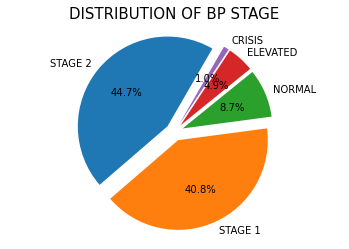

In [10]:
label =  "STAGE 2", "STAGE 1", "NORMAL", "ELEVATED","CRISIS"
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
sizes = data["BP STAGE"].value_counts(normalize = True)*100

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = label, autopct="%1.1f%%", shadow=False, startangle=60)
ax1.axis("equal") 
plt.title("DISTRIBUTION OF BP STAGE", size = 15)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

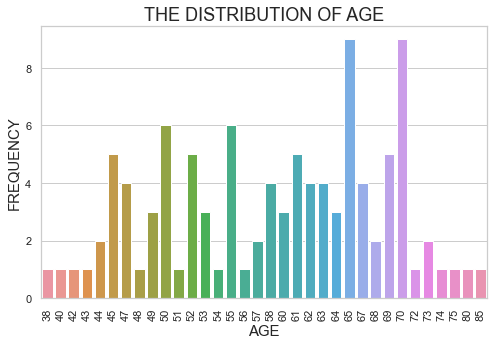

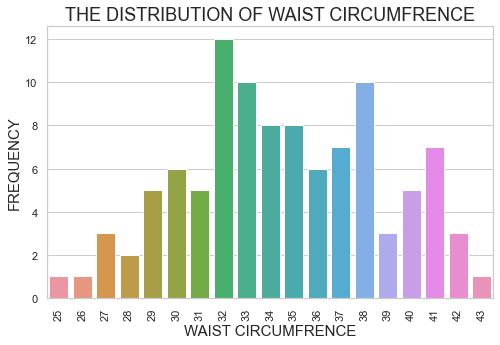

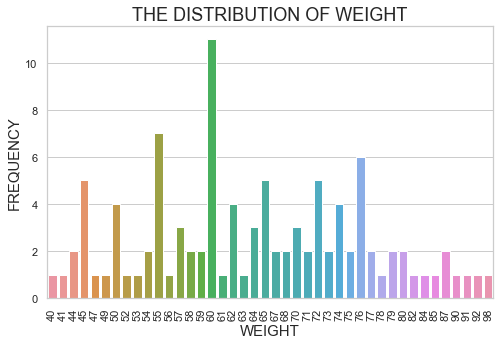

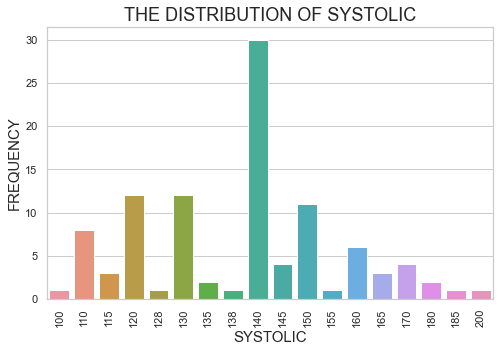

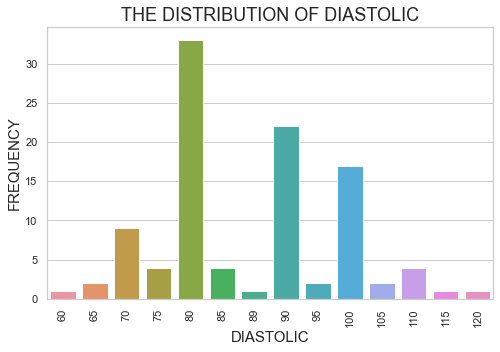

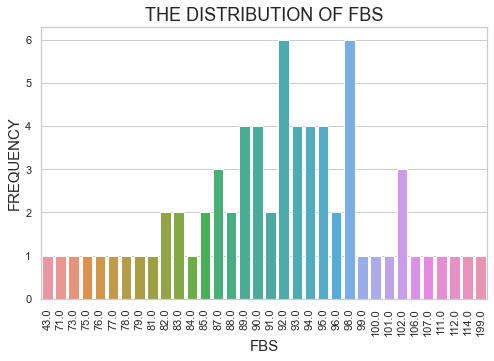

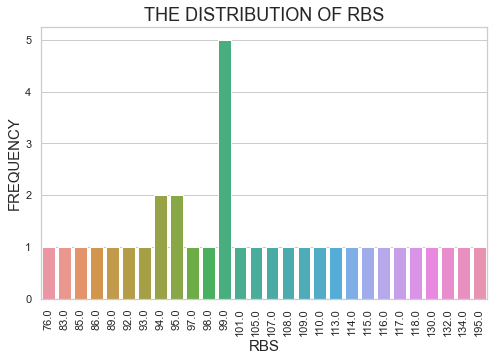

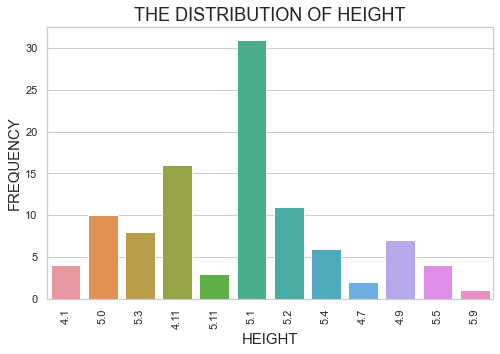

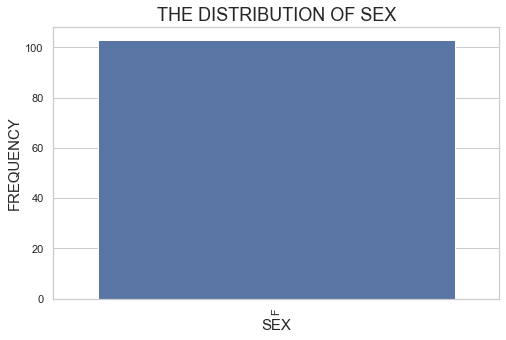

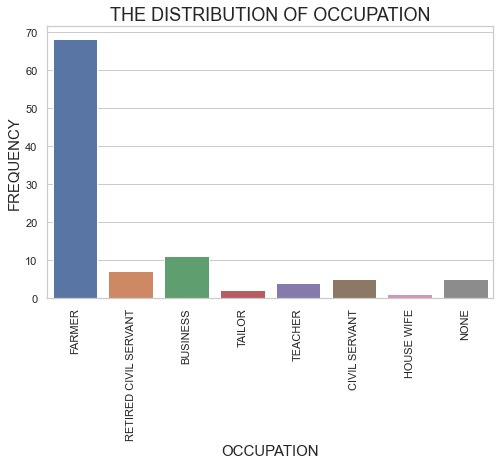

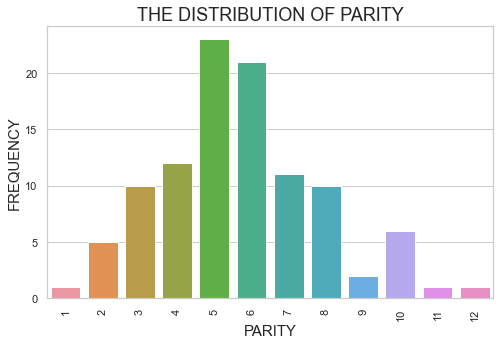

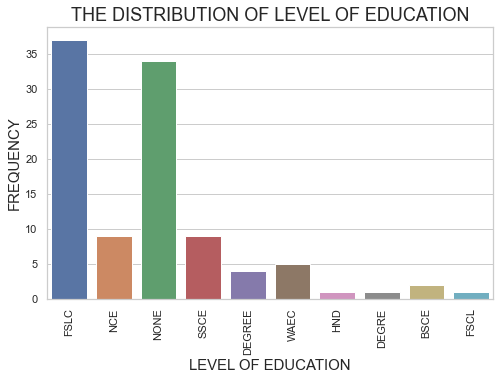

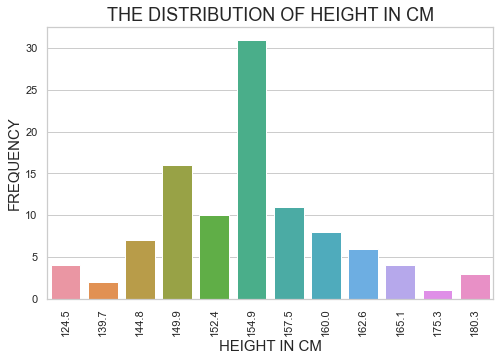

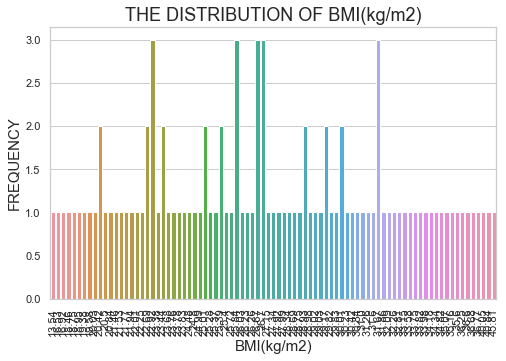

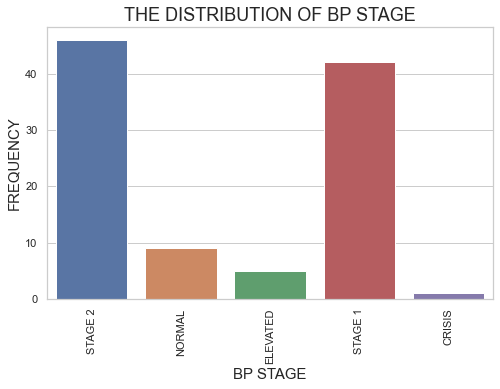

In [11]:
columns = data.columns
for n in columns:
    
    plt.figure(figsize = (8,5))
    sns.set_theme(style="whitegrid")
    p = sns.countplot(x=n, data=data)

    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    p.set_title( f"THE DISTRIBUTION OF {n}" , size = 18)
    p.set_xlabel(n, fontsize = 15)
    p.set_ylabel("FREQUENCY", fontsize = 15)

Text(0.5, 1.0, 'DISTRIBUTION OF BMI')

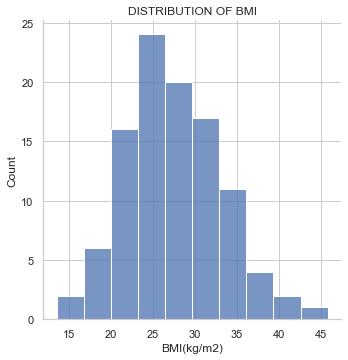

In [12]:
sns.displot(data['BMI(kg/m2)'])
plt.title("DISTRIBUTION OF BMI")

Text(0.5, 1.0, 'BOX PLOT OF BMI')

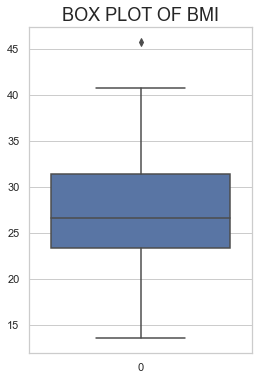

In [13]:
fig, ax = plt.subplots(figsize=(4,6))
P=sns.boxplot(data=data['BMI(kg/m2)'])
P.set_title("BOX PLOT OF BMI" , size = 18)

Text(0.5, 1.0, 'BOX PLOT OF HEIGHT')

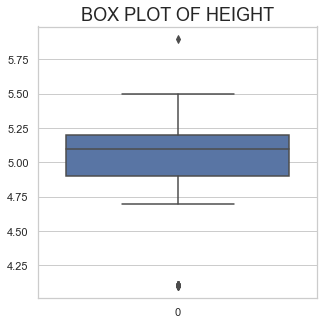

In [14]:
#height boxplot
P=sns.boxplot(data=data['HEIGHT'])
P.set_title("BOX PLOT OF HEIGHT" , size = 18)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'SCATTER PLOT OF BP STAGE AND AGE'}, xlabel='BP STAGE', ylabel='AGE'>

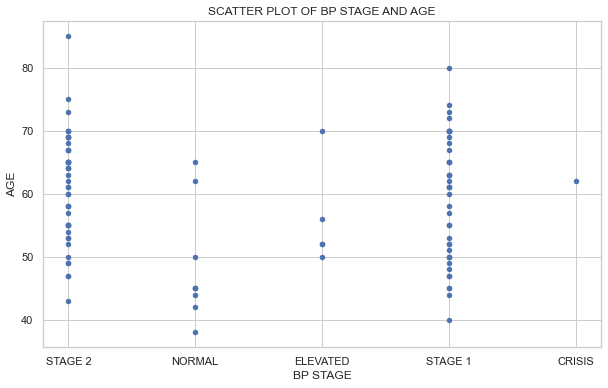

In [15]:

data.plot(x='BP STAGE', y='AGE', kind='scatter',
        figsize=(10,6),
        title='SCATTER PLOT OF BP STAGE AND AGE')

<AxesSubplot:xlabel='BP STAGE', ylabel='AGE'>

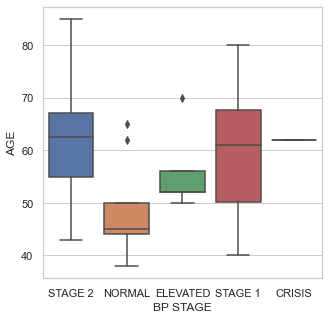

In [16]:
sns.boxplot(x='BP STAGE', y='AGE', data=data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'SCATTER PLOT OF BP STAGE AND BMI'}, xlabel='BP STAGE', ylabel='BMI(kg/m2)'>

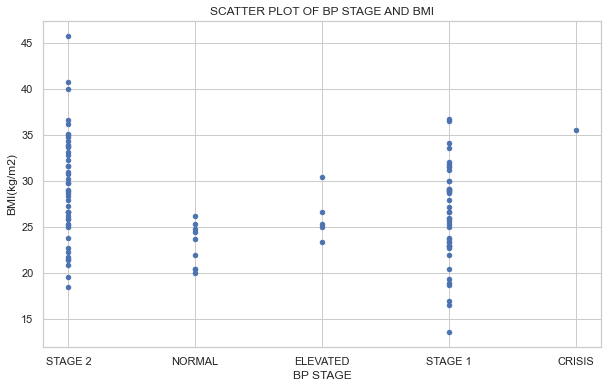

In [17]:
data.plot(x='BP STAGE', y='BMI(kg/m2)', kind='scatter',
        figsize=(10,6),
        title='SCATTER PLOT OF BP STAGE AND BMI')

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


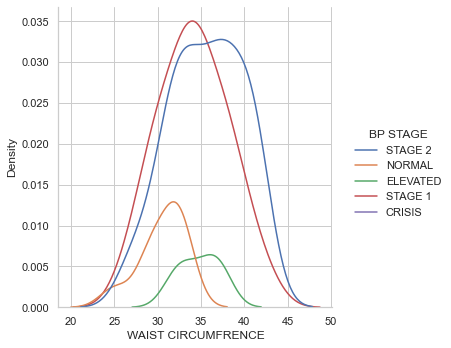

In [18]:
sns.displot(data=data, x='WAIST CIRCUMFRENCE', hue="BP STAGE", kind="kde")

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


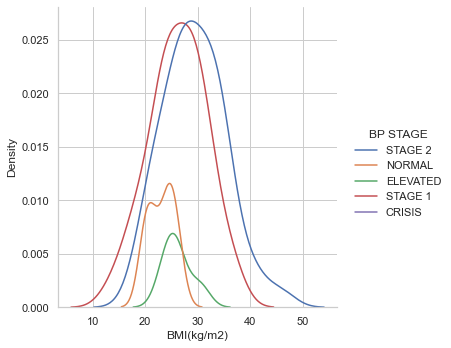

In [19]:
sns.displot(x='BMI(kg/m2)', hue='BP STAGE', data=data,kind='kde')

<AxesSubplot:>

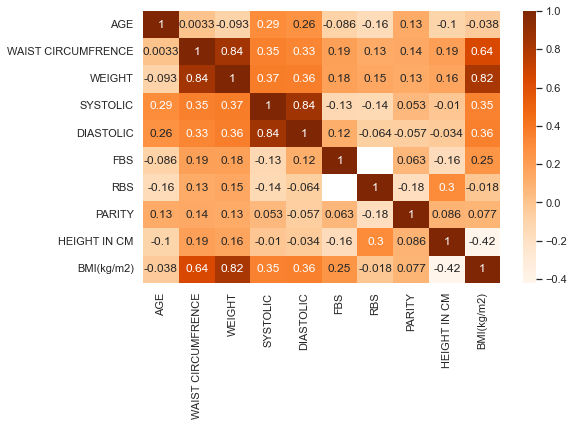

In [20]:
#showing the correlation of each numeric feature with others
corr = data[['AGE', 'WAIST CIRCUMFRENCE', 'WEIGHT', 'SYSTOLIC', 'DIASTOLIC', 'FBS', 'RBS', 'HEIGHT', 'PARITY', 'HEIGHT IN CM', 'BMI(kg/m2)']]
corr=corr.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr,cmap='Oranges', annot = True)

<AxesSubplot:xlabel='FBS', ylabel='AGE'>

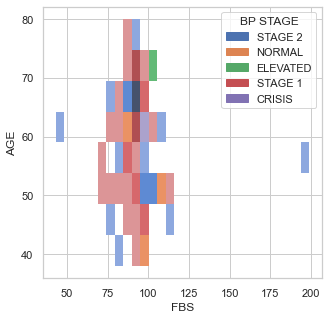

In [21]:
sns.histplot(data,x='FBS',y='AGE', hue='BP STAGE')

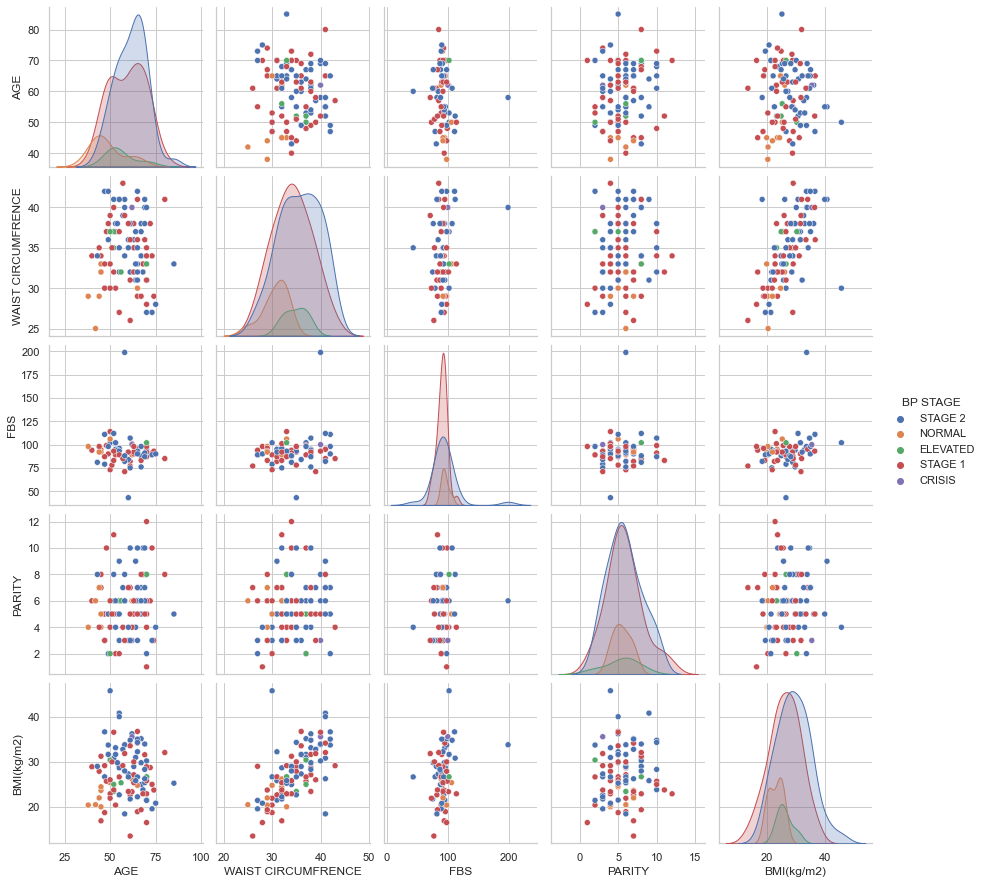

In [22]:
corr = data[['AGE', 'WAIST CIRCUMFRENCE', 'FBS', 'PARITY', 'BMI(kg/m2)','BP STAGE']]
sns.pairplot(corr,hue='BP STAGE')

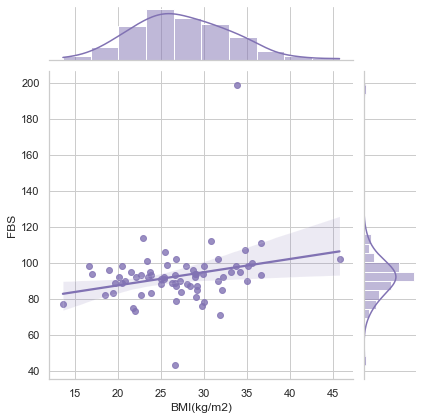

In [23]:
sns.jointplot(x='BMI(kg/m2)', y='FBS', data=data,
                  kind="reg",
                  color="m")